In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/berlin-district-population/Population_Berlin.csv


In [2]:
data = pd.read_csv('/kaggle/input/berlin-district-population/Population_Berlin.csv',encoding= 'unicode_escape')

In [3]:
data.head(5)

,Postleitzah,Bezirk,Ins-\ngesamt,unter 6,6 - 15,15 - 18,18 - 27,27 - 45,45 - 55,55 - 65,65 und\nmehr,Darunter\nweiblich
0,10115,Mitte,26274,1754,2051,473,2461,11595,4253,2041,1646,12818
1,10117,Mitte,15531,782,881,250,1558,5346,2342,1854,2518,7489
2,10119,Mitte,15064,1014,1087,213,1319,6650,2543,1158,1080,7489
3,10119,Pankow,4606,336,426,118,423,1753,991,349,210,2258
4,10178,Mitte,14385,692,714,203,1588,5100,1856,1473,2759,6953


In [4]:
data.rename(columns={"Bezirk":"District","Darunter\nweiblich":"Female","Ins-\ngesamt":"Total",
                     "65 und\nmehr":"above 65","Postleitzah":"Postalcode", "unter 6":" under 6"}, inplace=True)

In [5]:
data.sample(5)

,Postalcode,District,Total,under 6,6 - 15,15 - 18,18 - 27,27 - 45,45 - 55,55 - 65,above 65,Female
162,13349,Mitte,14586,763,827,246,1804,4277,1916,1709,3044,7284
46,10777,Charlbg.-Wilmersd.,3275,123,183,39,321,854,492,435,828,1661
188,13587,Spandau,22209,1120,1554,513,2160,4957,3055,2928,5922,11489
94,12161,Steglitz-Zehlend.,1664,93,87,32,166,511,240,254,281,899
0,10115,Mitte,26274,1754,2051,473,2461,11595,4253,2041,1646,12818


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Postalcode  218 non-null    int64 
 1   District    218 non-null    object
 2   Total       218 non-null    int64 
 3    under 6    218 non-null    int64 
 4    6 - 15     218 non-null    int64 
 5   15 - 18     218 non-null    int64 
 6   18 - 27     218 non-null    int64 
 7   27 - 45     218 non-null    int64 
 8   45 - 55     218 non-null    int64 
 9   55 - 65     218 non-null    int64 
 10  above 65    218 non-null    int64 
 11  Female      218 non-null    int64 
dtypes: int64(11), object(1)
memory usage: 20.6+ KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Postalcode,218.0,12149.944954,1272.238550,10115.0,10785.50,12278.0,13350.50,14199.0
Total,218.0,17022.610092,8927.282710,43.0,11937.75,17428.0,23030.00,39351.0
under 6,218.0,1018.665138,621.217218,0.0,639.25,998.0,1343.75,3163.0
6 - 15,218.0,1284.692661,756.165723,0.0,798.75,1259.5,1718.50,3906.0
15 - 18,218.0,394.848624,227.108431,0.0,246.00,387.5,551.75,987.0
18 - 27,218.0,1686.110092,998.107586,3.0,1078.00,1641.5,2228.50,5263.0
27 - 45,218.0,4844.977064,3295.638568,18.0,2730.75,4437.0,6642.25,19655.0
45 - 55,218.0,2466.678899,1292.018054,3.0,1810.50,2519.5,3172.00,6329.0
55 - 65,218.0,2074.766055,1121.657421,7.0,1475.25,2152.0,2753.25,5760.0
above 65,218.0,3251.871560,1968.928170,9.0,1756.50,3228.5,4787.75,8762.0


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


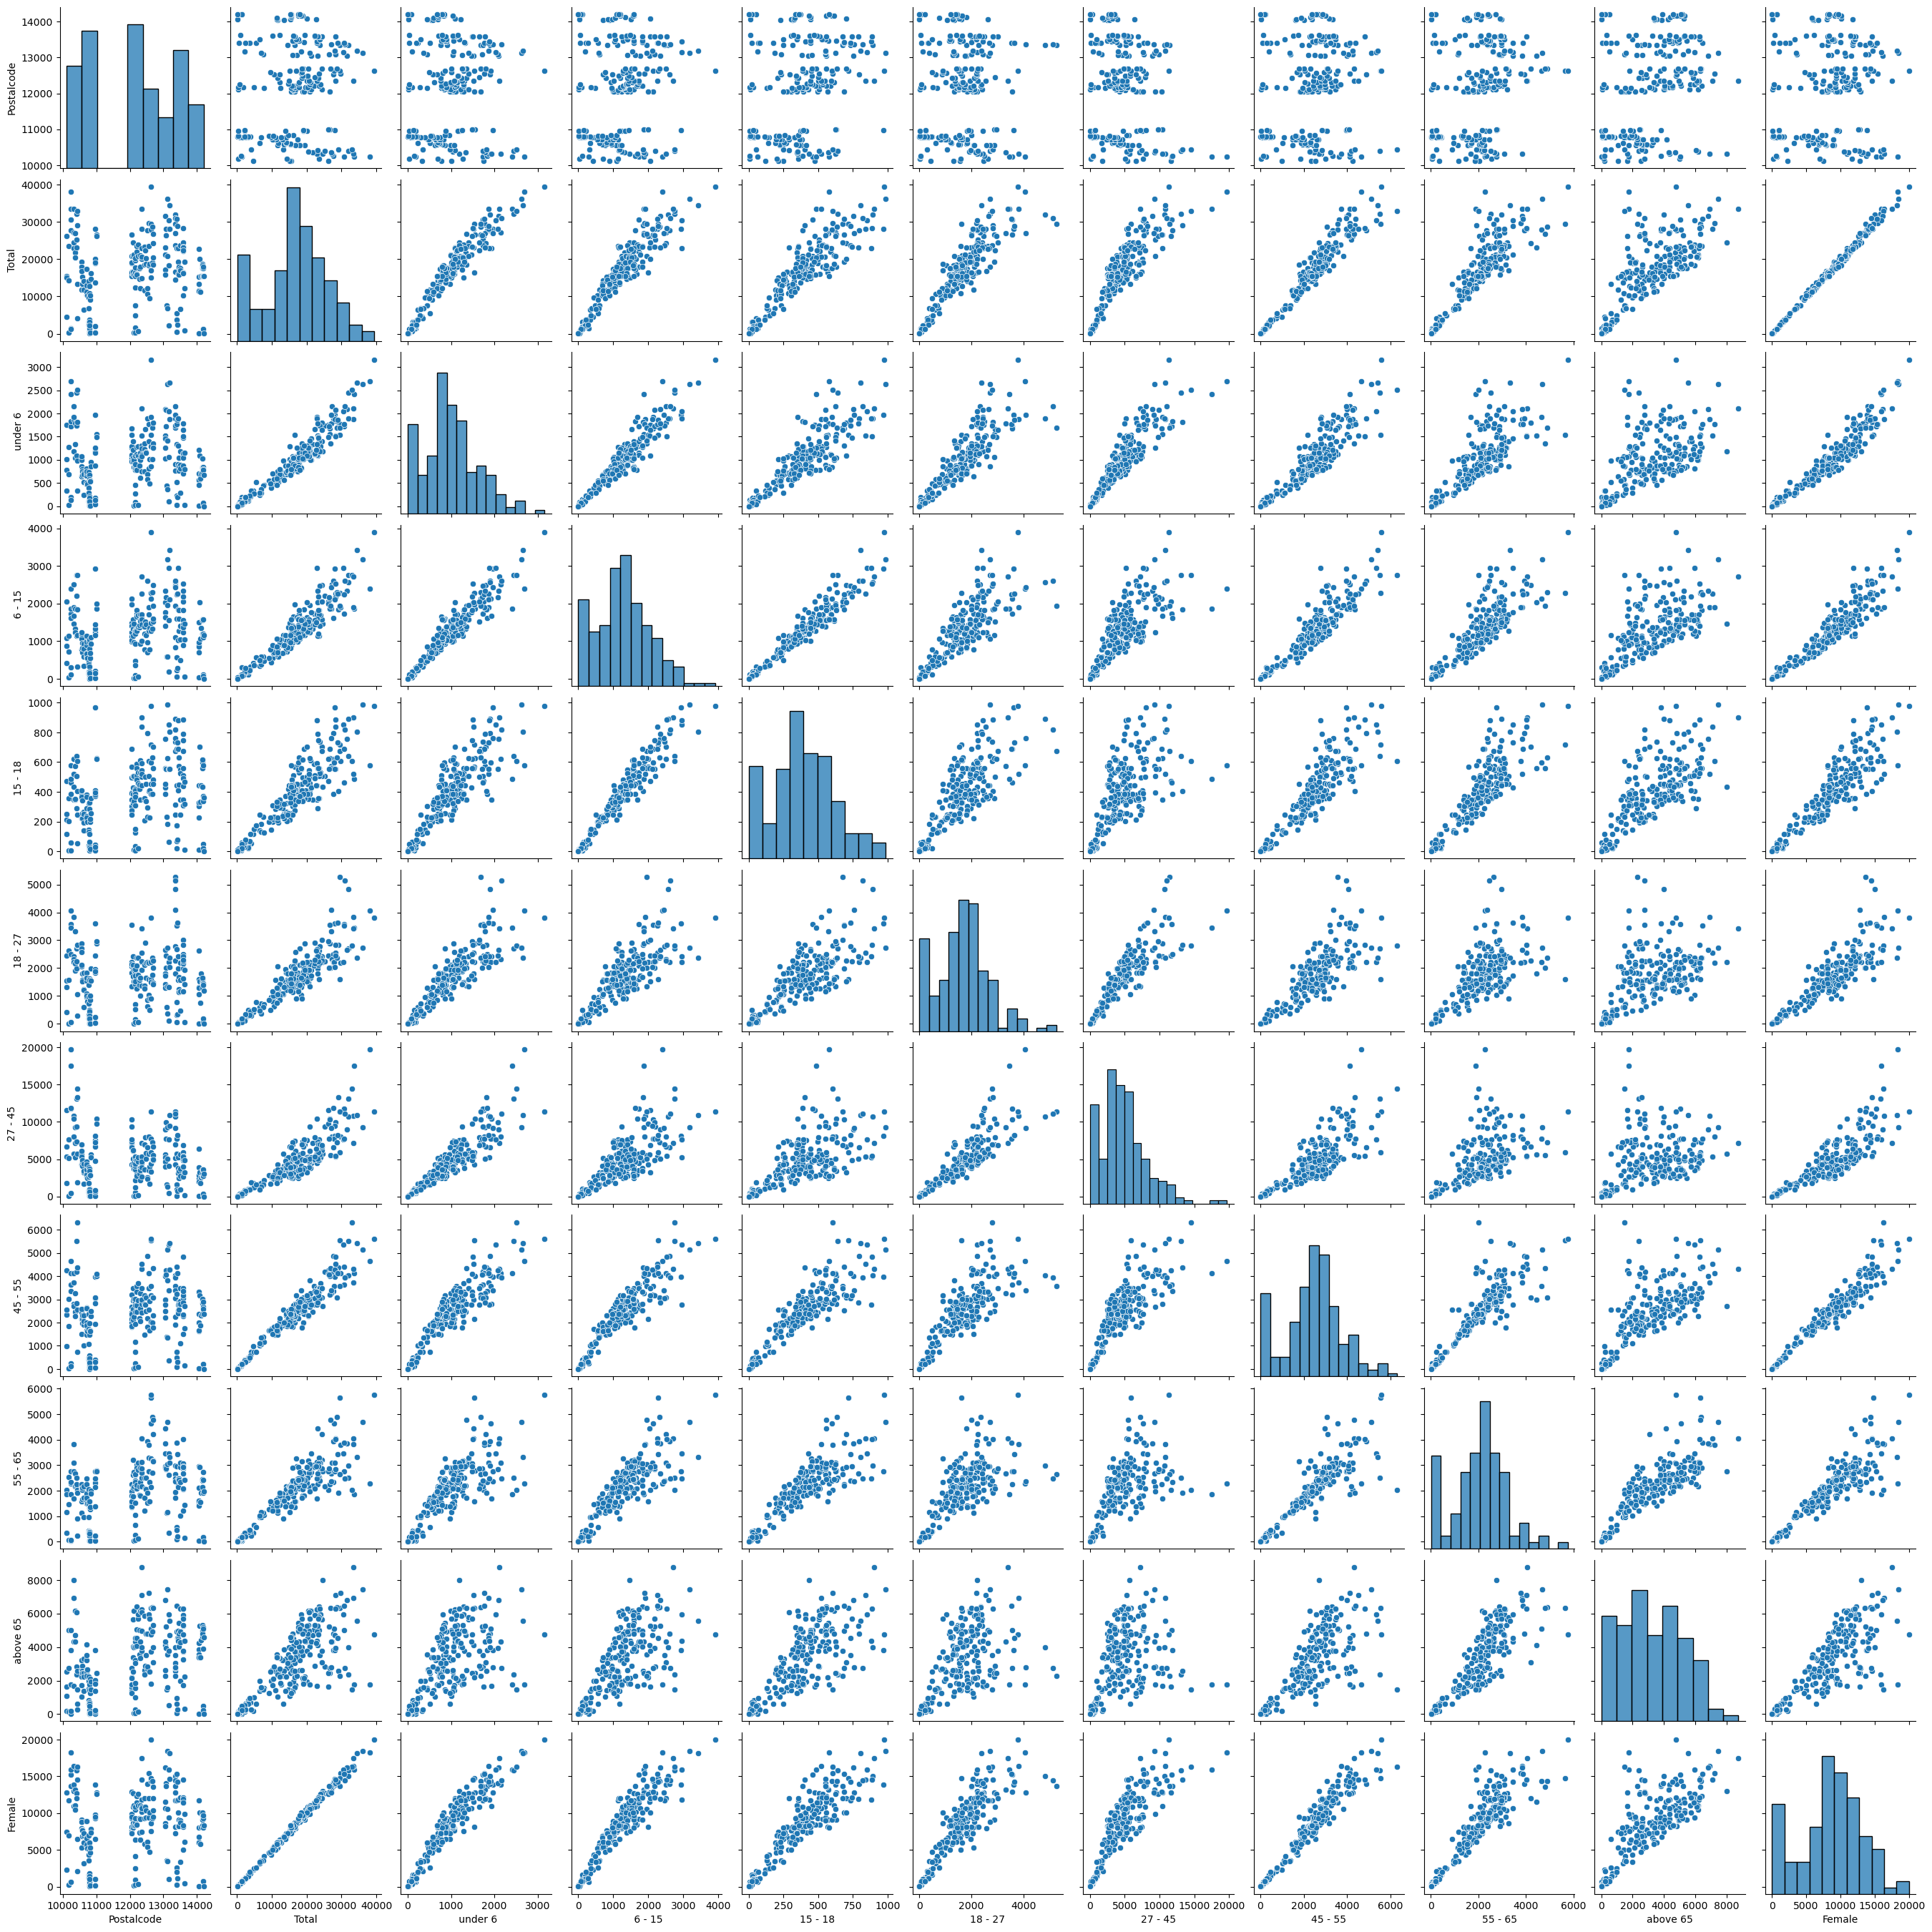

In [9]:
sns.pairplot(data)

/tmp/ipykernel_21/3770272030.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True).set(title='Correlation between the features')


[Text(0.5, 1.0, 'Correlation between the features')]

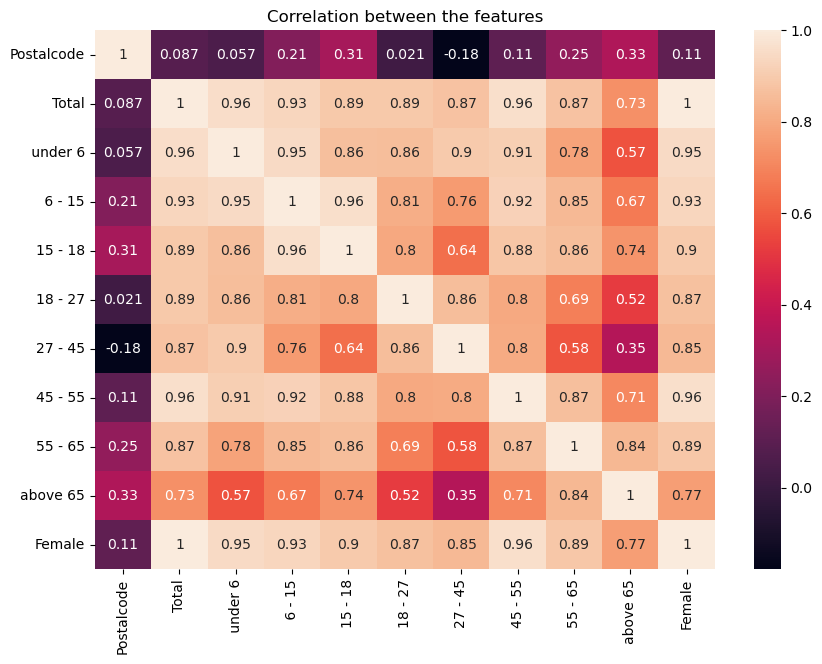

In [10]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True).set(title='Correlation between the features')

**Only postcode is not so much correalted with other features but other features are higly correlated.**

In [11]:
data['District'].unique()

array(['Mitte', 'Pankow', 'Friedrichsh.-Kreuzb.', 'Lichtenberg',
       'Charlbg.-Wilmersd.', 'Tempelh.-Sch\x9aneb.', 'Neuk\x9alln',
       'Steglitz-Zehlend.', 'Treptow-K\x9apenick', 'Marzahn-Hellersd.',
       'Reinickendorf', 'Spandau'], dtype=object)

**Berlin districts and total number of district** 

In [12]:
data['District'].nunique()

12

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 154 (\x9a) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 154 (\x9a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


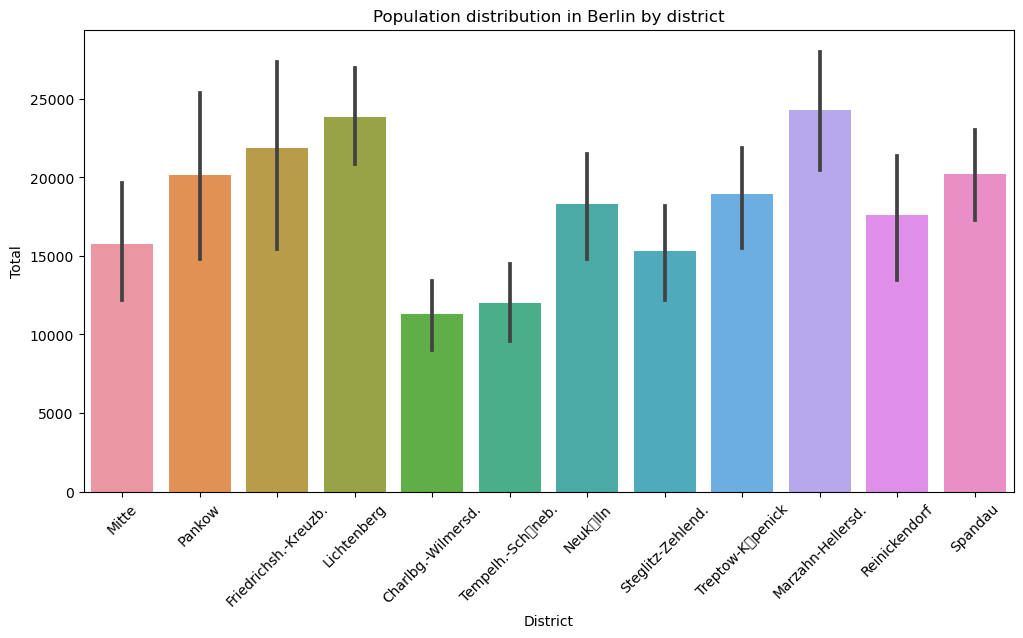

In [13]:
fig,ax = plt.subplots(figsize=(12,6))
plot =sns.barplot(data, x='District',y='Total').set(title='Population distribution in Berlin by district')
plt.setp(ax.get_xticklabels(), rotation = 45)


**Lichtenberg and Marzahn-Hellersdorf are mostly populated districts**

**Now will make another column by subtracting Female from Total column.Finally, will use calculated column for gender distribution in Berlin**

In [14]:
data['Male'] = data['Total']-data['Female']

In [15]:
data.tail(2)

,Postalcode,District,Total,under 6,6 - 15,15 - 18,18 - 27,27 - 45,45 - 55,55 - 65,above 65,Female,Male
216,14199,Charlbg.-Wilmersd.,15369,681,1157,362,1204,3056,2364,1975,4570,8303,7066
217,14199,Steglitz-Zehlend.,43,0,0,0,6,18,3,7,9,19,24


In [16]:
data.columns

Index(['Postalcode', 'District', 'Total', ' under 6', ' 6 - 15', '15 - 18',
       '18 - 27', '27 - 45', '45 - 55', '55 - 65', 'above 65', 'Female',
       'Male'],
      dtype='object')

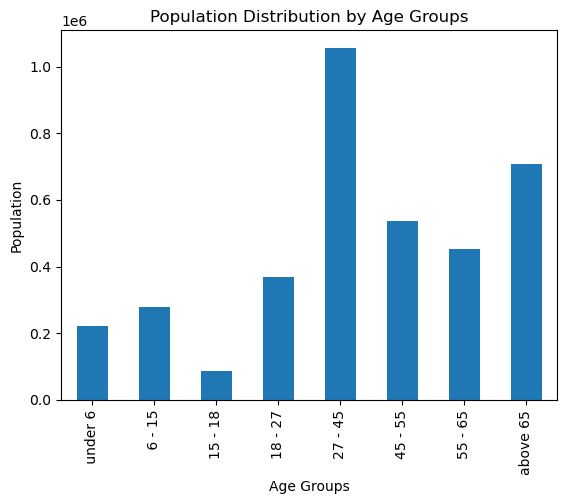

In [17]:
# Population distribution across age groups
age_groups = data.columns[3:11]
data[age_groups].sum().plot(kind='bar', xlabel='Age Groups', ylabel='Population', title='Population Distribution by Age Groups')
plt.show()


**Age group '27-45' is maximum where '15-18' is lowest**

**Let's see the actual number:**

In [18]:
data[age_groups].sum().sort_values(ascending=False)

27 - 45     1056205
above 65     708908
45 - 55      537736
55 - 65      452299
18 - 27      367572
 6 - 15      280063
 under 6     222069
15 - 18       86077
dtype: int64

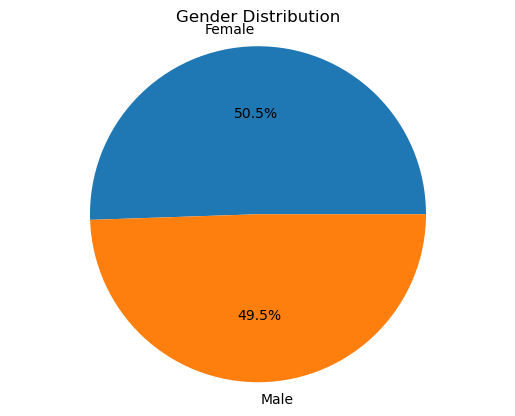

In [19]:
# Gender distribution
gender_counts = data[['Female', 'Male']].sum()
gender_counts.plot(kind='pie', autopct='%1.1f%%', labels=['Female', 'Male'], title='Gender Distribution')
plt.axis('equal')
plt.show()

In [20]:
# Age Group Analysis
total_population = data['Total'].sum()
age_group_percentages = data[age_groups].sum() / total_population * 100
print(age_group_percentages)

 under 6     5.984189
 6 - 15      7.546978
15 - 18      2.319554
18 - 27      9.905121
27 - 45     28.462010
45 - 55     14.490603
55 - 65     12.188296
above 65    19.103249
dtype: float64


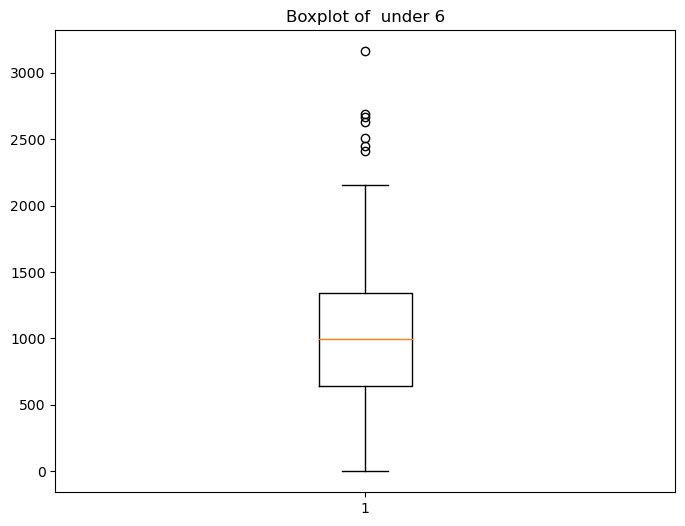

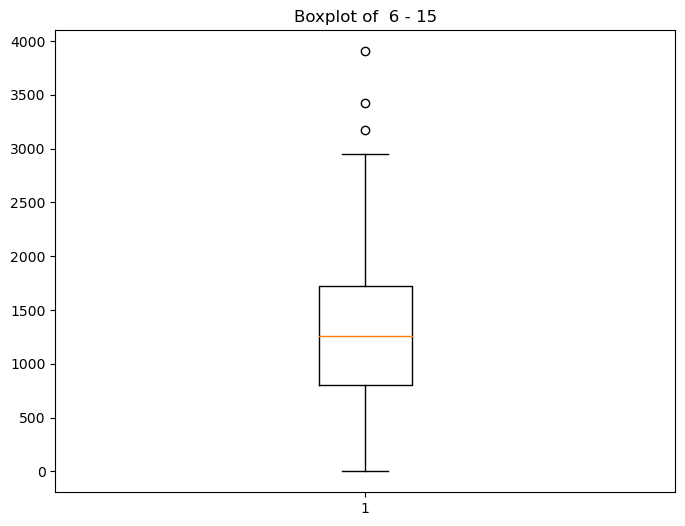

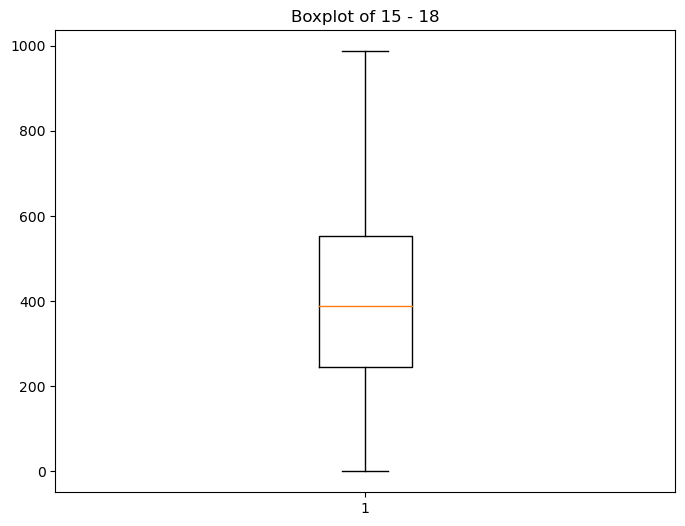

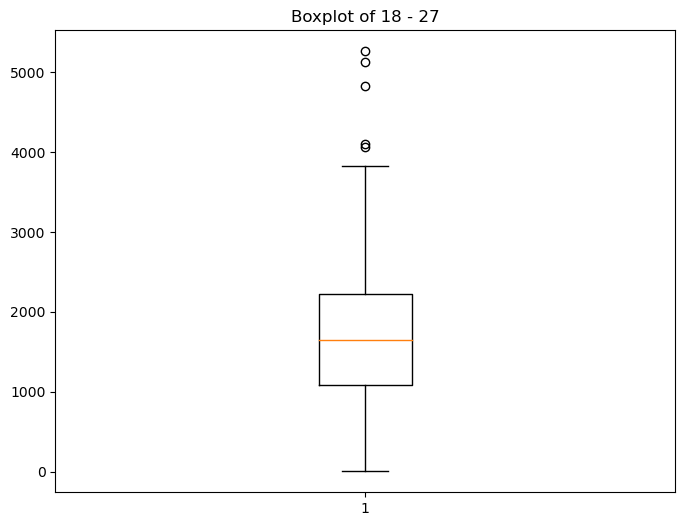

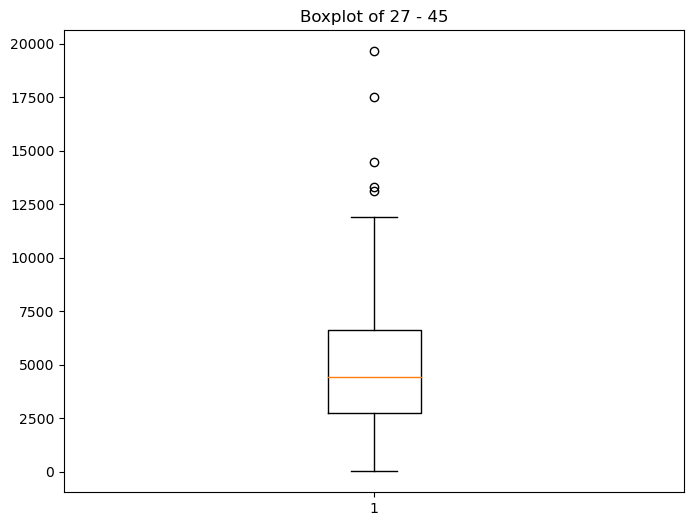

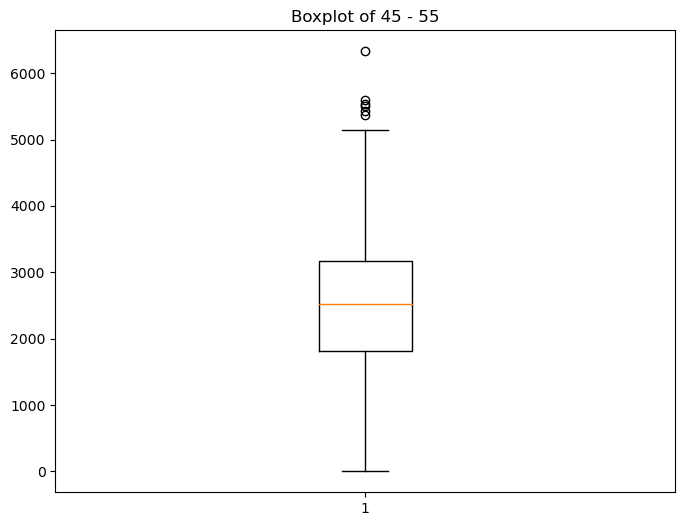

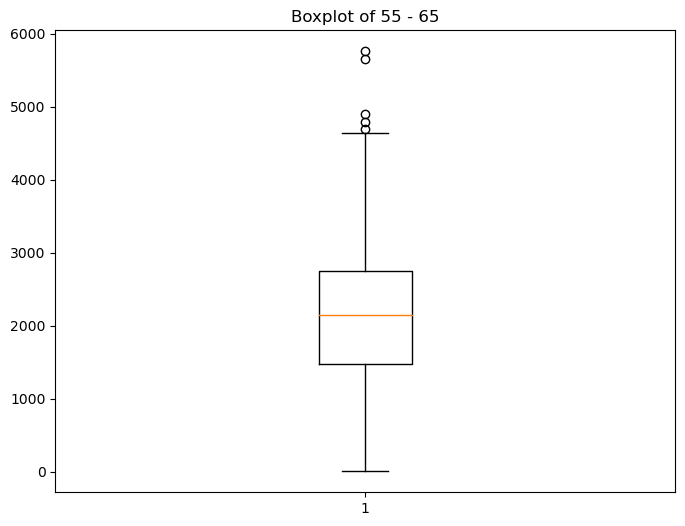

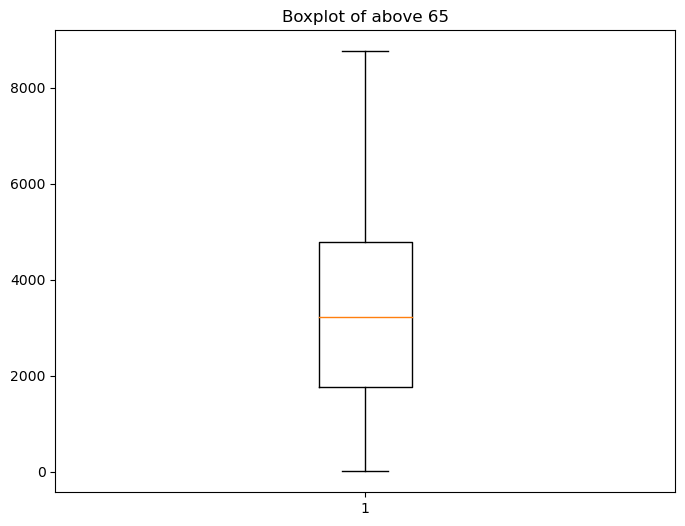

In [21]:
# Outlier Detection
outlier_columns = data.columns[3:11]
for col in outlier_columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

**Here, there are good number of outliers for different age groups excluding age group is '15-18'**

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 154 (\x9a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


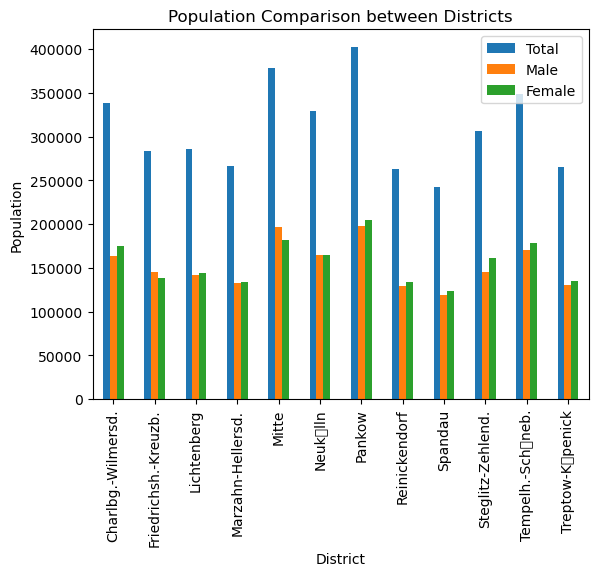

In [22]:
# Comparison Between Districts
df_grouped = data.groupby('District').sum()
df_grouped[['Total','Male', 'Female']].plot(kind='bar', stacked=False, title='Population Comparison between Districts')
plt.xlabel('District')
plt.ylabel('Population')
plt.show()

**Highest number of people live in Pankow district**

In [23]:
pc=data['Postalcode'].nunique()
print("Total number of Postal Code in Berlin :")
print(pc)

Total number of Postal Code in Berlin :
190


/tmp/ipykernel_21/3639961412.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = data.groupby('Postalcode').sum()


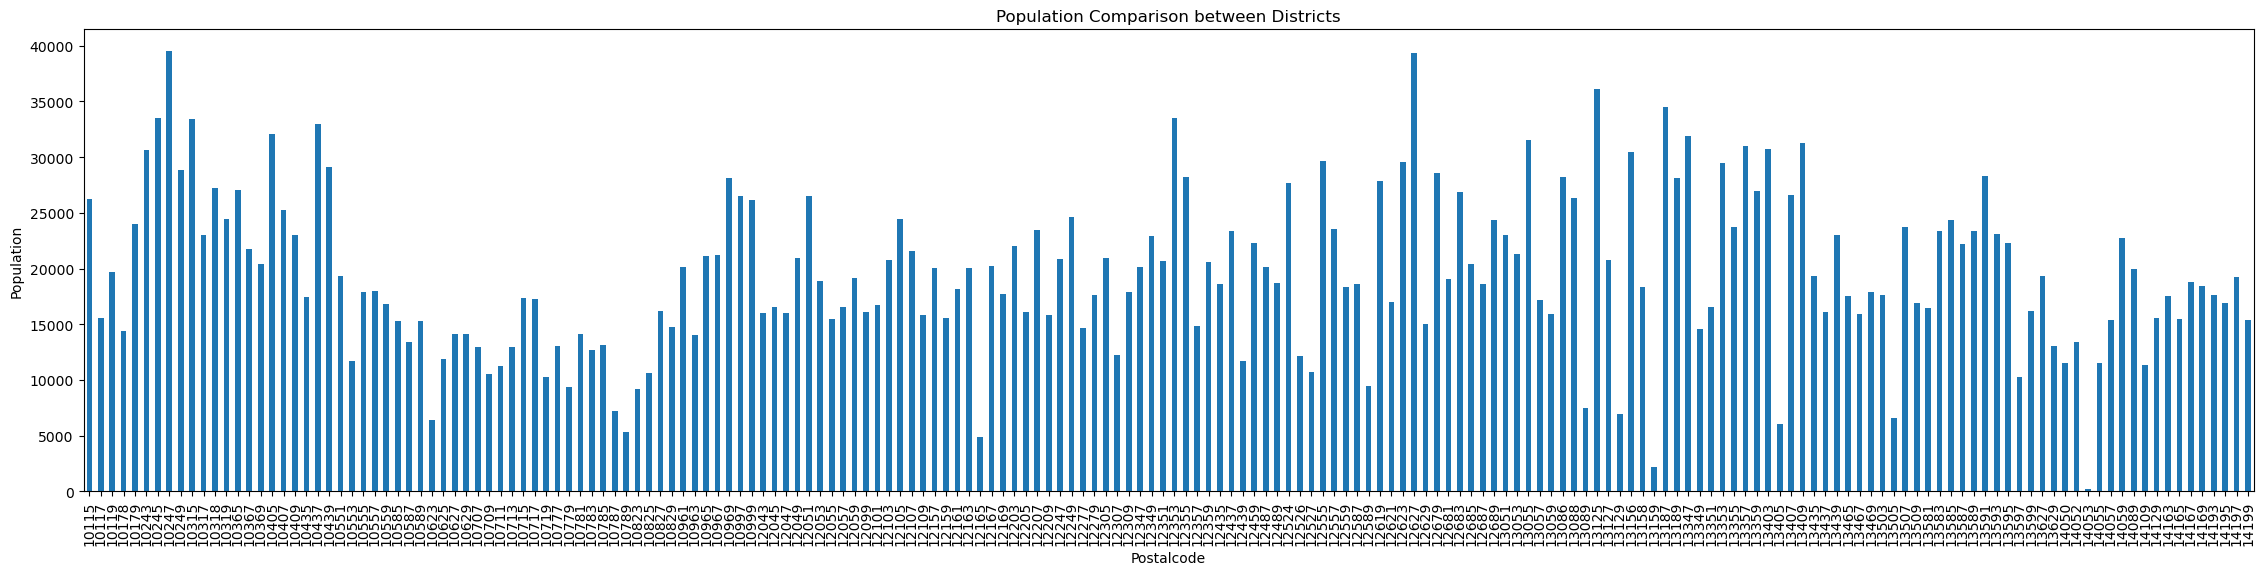

In [24]:
# Comparison Between Postalcode

plt.figure(figsize=(28,6))
df_grouped = data.groupby('Postalcode').sum()
df_grouped['Total'].plot(kind='bar', stacked=False, title='Population Comparison between Districts')
plt.xlabel('Postalcode')
plt.ylabel('Population')
plt.show()

**10247 & 12627 postal code have highest number of population**

In [25]:
#finding maximum population postal code
max=data.query('Total == Total.max()')
print(max)

     Postalcode           District  Total   under 6   6 - 15  15 - 18  \
137       12627  Marzahn-Hellersd.  39351      3163     3906      976   

     18 - 27  27 - 45  45 - 55  55 - 65  above 65  Female   Male  
137     3800    11367     5601     5760      4778   19972  19379  


In [26]:
three_highest=data.nlargest(3,['Total'])
print(three_highest)

     Postalcode              District  Total   under 6   6 - 15  15 - 18  \
137       12627     Marzahn-Hellersd.  39351      3163     3906      976   
9         10247  Friedrichsh.-Kreuzb.  38094      2691     2403      578   
153       13125                Pankow  36091      2630     3171      987   

     18 - 27  27 - 45  45 - 55  55 - 65  above 65  Female   Male  
137     3800    11367     5601     5760      4778   19972  19379  
9       4063    19655     4651     2282      1771   18307  19787  
153     2727     9287     5138     4691      7460   18451  17640  


In [27]:
#finding minimum population postal code
min=data.query('Total == Total.min()')
print(min)

     Postalcode           District  Total   under 6   6 - 15  15 - 18  \
217       14199  Steglitz-Zehlend.     43         0        0        0   

     18 - 27  27 - 45  45 - 55  55 - 65  above 65  Female  Male  
217        6       18        3        7         9      19    24  


In [28]:
three_lowest=data.nsmallest(3,['Total'])
print(three_lowest)

     Postalcode            District  Total   under 6   6 - 15  15 - 18  \
217       14199   Steglitz-Zehlend.     43         0        0        0   
55        10787  Charlbg.-Wilmersd.    124         3        6        4   
200       14053  Charlbg.-Wilmersd.    199        14       40        9   

     18 - 27  27 - 45  45 - 55  55 - 65  above 65  Female  Male  
217        6       18        3        7         9      19    24  
55         3       31       12       24        41      55    69  
200        6       42       34       30        24     100    99  


# Thank you.
**leave your opinion in comment section**